
## <center><span style='background:blue'>Segmentez des clients d'un site e-commerce (partie 1)</span></center>
=========================================================================================================================

### Table of Contents <a class="anchor" id="sommaire"></a>

* [Analyse exploratoire](#00)
    * [Inroduction](#0)
    * [Informations sur les clients : Identifiant, Ville, Etat, code postal, localisation](#1)
    * [Informations sur les commandes](#2)
    * [Informations sur les paiements effectués par les clients qui ont passé les commandes](#4)
    * [Informations sur les avis des clients sur les commandes passés](#5)
    * [Informations sur les vendeurs](#6)
    * [Construire le fichiers pour la segmentation RFM](#7)

# Analyse exploratoire<a class="anchor" id="00"></a>

## Introduction<a class="anchor" id="0"></a>

Ce projet consiste à aider les équipes d’Olist à regrouper les clients de profils similaires pour leur compagnes marketing et à proposer un contrat de maintenance.   
Pour réaliser ce projet, on va analyser la base de données fournie par Olist.
Ce jeu de données comporte de différentes informations concernant les clients, leurs commandes, les produits, leurs avis …
Pour répondre à ce sujet, on va utiliser des méthodes supervisées sur des données RFM.


**Importation de données**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = '/Users/modes/OneDrive/Documents/openclassroums/Projet5/olist/'
folder = os.listdir(path)
folder

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
olist_customers_dataset = pd.read_csv(path + "olist_customers_dataset.csv")
olist_geolocation_dataset = pd.read_csv(path + "olist_geolocation_dataset.csv")
olist_orders_dataset = pd.read_csv(path + "olist_orders_dataset.csv")
olist_order_items_dataset = pd.read_csv(path + "olist_order_items_dataset.csv")
olist_order_payments_dataset = pd.read_csv(path + "olist_order_payments_dataset.csv")
olist_order_reviews_dataset = pd.read_csv(path + "olist_order_reviews_dataset.csv")
olist_products_dataset = pd.read_csv(path + "olist_products_dataset.csv")
olist_sellers_dataset = pd.read_csv(path + "olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv(path + "product_category_name_translation.csv")

In [4]:
for fichier in folder:
    print(str(fichier[:-4]), eval(fichier[:-4]).shape)

olist_customers_dataset (99441, 5)
olist_geolocation_dataset (1000163, 5)
olist_orders_dataset (99441, 8)
olist_order_items_dataset (112650, 7)
olist_order_payments_dataset (103886, 5)
olist_order_reviews_dataset (99224, 7)
olist_products_dataset (32951, 9)
olist_sellers_dataset (3095, 4)
product_category_name_translation (71, 2)


**Il y a 9 fichiers fournis par Olist qui sont liés entre eux avec des clés-valeurs comme montré dans la figure ci-dessous:**

<img src="HRhd2Y0.png"
     style="width: 750px;" />

<a href="#sommaire" rev="footnote">&#8617;</a>

## Informations sur les clients : Identifiant, Ville, Etat, code postal, localisation <a class="anchor" id="1"></a>

**olist_customers_dataset**

In [5]:
df_customers = olist_customers_dataset.copy()
%store df_customers
df_customers.head()

Stored 'df_customers' (DataFrame)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
print("La dimension de ce dataframe est :",df_customers.shape)

La dimension de ce dataframe est : (99441, 5)


In [7]:
df_customers.customer_zip_code_prefix.describe()

count    99441.000000
mean     35137.474583
std      29797.938996
min       1003.000000
25%      11347.000000
50%      24416.000000
75%      58900.000000
max      99990.000000
Name: customer_zip_code_prefix, dtype: float64

**olist_geolocation_dataset**

In [8]:
df_geolocalisation = olist_geolocation_dataset.copy()
df_geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
print("La dimension de ce dataframe est :",df_geolocalisation.shape)

La dimension de ce dataframe est : (1000163, 5)


In [10]:
df_geolocalisation.geolocation_zip_code_prefix.describe()

count    1.000163e+06
mean     3.657417e+04
std      3.054934e+04
min      1.001000e+03
25%      1.107500e+04
50%      2.653000e+04
75%      6.350400e+04
max      9.999000e+04
Name: geolocation_zip_code_prefix, dtype: float64

In [11]:
df_geolocalisation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'},
                         inplace=True)
df_geolocalisation.head()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Les doublons dans la variable "customer_zip_code_prefix"**

In [12]:
tmp = df_geolocalisation[df_geolocalisation.duplicated(subset=df_geolocalisation.columns,
                                                 keep=False)]
tmp.sort_values(by="geolocation_lat")

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
993075,98780,-36.603837,-64.287433,santa rosa,RS
993302,98780,-36.603837,-64.287433,santa rosa,RS
978479,96255,-33.691673,-53.450672,chui,RS
978749,96255,-33.691673,-53.450672,chui,RS
980017,96255,-33.691550,-53.454576,chuí,RS
...,...,...,...,...,...
769436,68275,42.167251,-6.898559,porto trombetas,PA
769489,68275,42.167251,-6.898559,porto trombetas,PA
769391,68275,42.167251,-6.898559,porto trombetas,PA
860832,83252,42.184003,-8.723762,ilha dos valadares,PR


**Supression des doublons**

In [13]:
df_geolocalisation.drop_duplicates(subset=df_geolocalisation.columns,
                                   keep='first',
                                  inplace=True)

In [14]:
print("La dimension de ce dataframe est :",df_geolocalisation.shape)

La dimension de ce dataframe est : (738332, 5)


Pour obtenir un dataframe client avec les informations des clients et la géolocalisation, on devraient fusionner le dataframe qui contient les localisation et le dataframe qui contient les informations des clients.  

Or, le jeu de données sur les localisations contient 1 000 163 données (lignes), donc fusionner ces deux fichiers donne un fichier avec minimum 1 000 163 lignes (ce qui est énorme).  

Pour résoudre ce problème, on peut fusionner les deux fichiers par 'code postal' en prenant qu'une seule coordonnée géographique comme le premier élément par exemple.

In [15]:
dic = {"geolocation_lat" : 'first',
       "geolocation_lng" : 'first'}
df_geo = df_geolocalisation.groupby('customer_zip_code_prefix').agg(dic).reset_index()
df_geo

,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1002,-23.548318,-46.635421
2,1003,-23.549032,-46.635313
3,1004,-23.550116,-46.635122
4,1005,-23.549819,-46.635606
...,...,...,...
19010,99960,-27.953797,-52.029641
19011,99965,-28.173892,-52.038447
19012,99970,-28.345143,-51.876926
19013,99980,-28.389218,-51.846012


**Fusionner le dataframe sur les informations clients et la dataframe localisation**

In [16]:
merge_customers_loc = df_customers.merge(df_geo, 
                                         how="left",
                                         on="customer_zip_code_prefix")

In [17]:
merge_customers_loc.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593985,-46.910591


In [18]:
print("La dimension de dataframe fusionné est :",merge_customers_loc.shape)

La dimension de dataframe fusionné est : (99441, 7)


**Distribution des variables "customer_state" et "customer_city"**

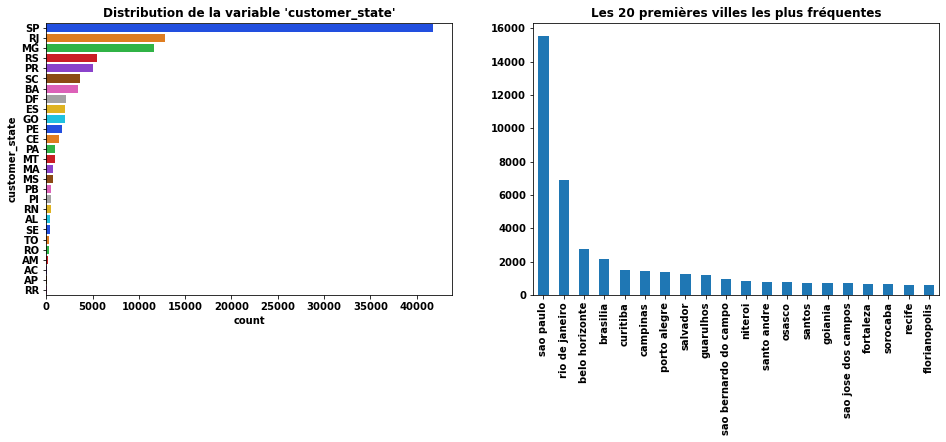

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
axis_order = merge_customers_loc.customer_state.value_counts().index
sns.countplot(data=merge_customers_loc, 
              y="customer_state" , 
              palette='bright', 
              order=axis_order, 
              ax=ax[0])
ax[0].set_title('Distribution de la variable \'customer_state\'')

#visualisation des 20 premières villes les' plus frèquentes
merge_customers_loc.customer_city.value_counts()[:20].plot.bar(ax=ax[1])
ax[1].set_title('Les 20 premières villes les plus fréquentes')
plt.show()
fig.savefig('analysis_1.png')

**Localisation des clients sur la carte du monde**

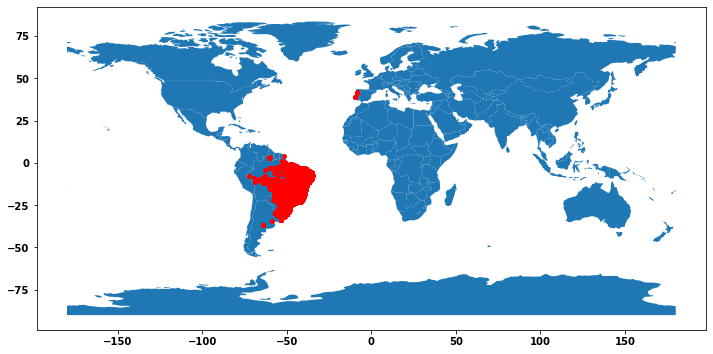

In [20]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(merge_customers_loc['geolocation_lng'], merge_customers_loc['geolocation_lat'])]
gdf = GeoDataFrame(merge_customers_loc, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15);

**Les valeurs manquantes**

In [21]:
print('Les valeurs manquantes dans chaque variable:')
merge_customers_loc.isnull().sum().sort_values(ascending=False)

Les valeurs manquantes dans chaque variable:


geolocation_lat             278
geolocation_lng             278
customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geometry                      0
dtype: int64

<a href="#sommaire" rev="footnote">&#8617;</a>

## Informations sur les commandes <a class="anchor" id="2"></a>

In [22]:
df_orders =  olist_orders_dataset.copy()
%store df_orders

Stored 'df_orders' (DataFrame)


In [23]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
print('La dimension de ce dataframe est :', df_orders.shape)

La dimension de ce dataframe est : (99441, 8)


**Type de variables**

In [25]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

**Transformation des dates de type object au type pandas.datetime**

In [26]:
date_vars = df_orders.columns[3:]
for var in date_vars:
    df_orders[var] = pd.to_datetime(df_orders[var])
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [27]:
df_orders.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Statut des commandes**

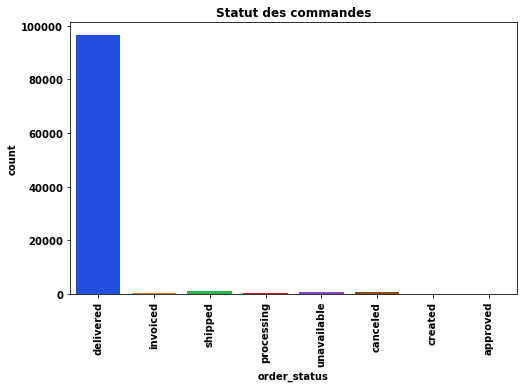

In [28]:
fig = plt.figure(figsize=(8,5))
sns.countplot(data=df_orders, x='order_status', palette='bright')
plt.xticks(rotation=90)
plt.title('Statut des commandes')
plt.show()

**Dates des commandes**

In [29]:
purchase_date = df_orders[['order_purchase_timestamp']].copy()
purchase_date['Year'] = df_orders["order_purchase_timestamp"].dt.year
purchase_date['Month'] = df_orders["order_purchase_timestamp"].dt.month_name()
purchase_date['Day'] = df_orders["order_purchase_timestamp"].dt.day
purchase_date['Day_name'] = df_orders["order_purchase_timestamp"].dt.day_name()
purchase_date['Hour'] = df_orders["order_purchase_timestamp"].dt.hour
purchase_date.head()

,order_purchase_timestamp,Year,Month,Day,Day_name,Hour
0,2017-10-02 10:56:33,2017,October,2,Monday,10
1,2018-07-24 20:41:37,2018,July,24,Tuesday,20
2,2018-08-08 08:38:49,2018,August,8,Wednesday,8
3,2017-11-18 19:28:06,2017,November,18,Saturday,19
4,2018-02-13 21:18:39,2018,February,13,Tuesday,21


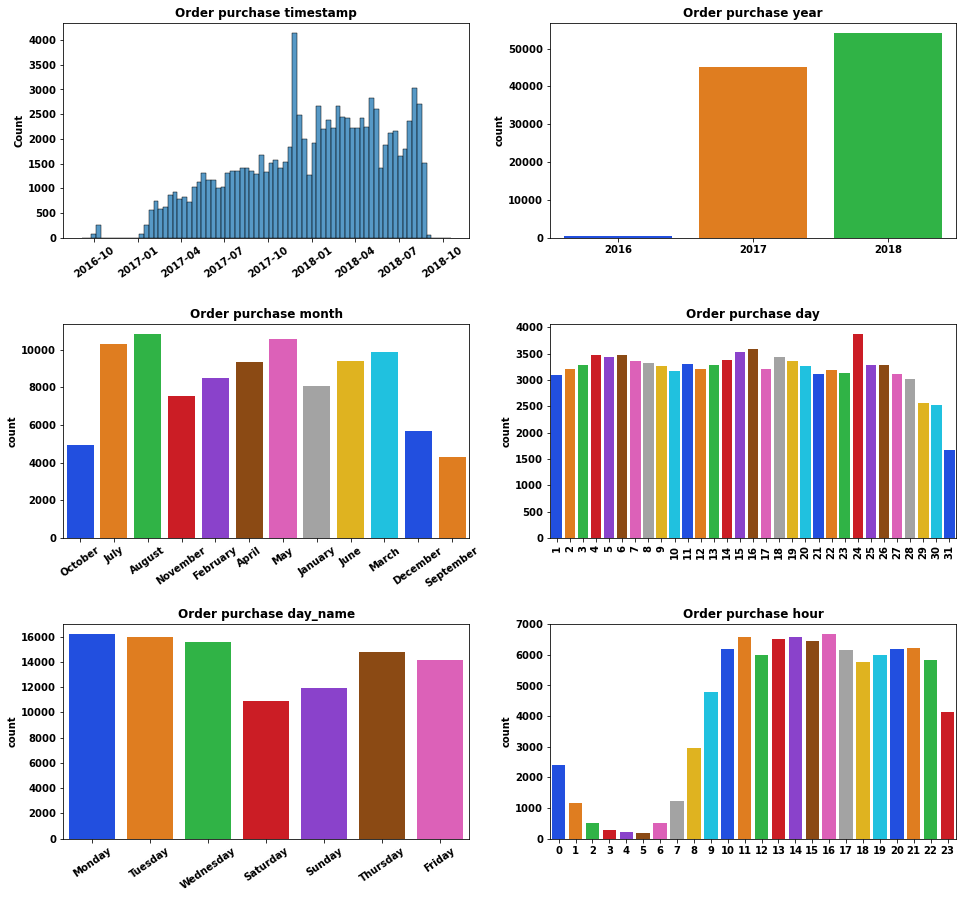

In [30]:
fig, ax = plt.subplots(3,2,figsize=(16,15))
plt.subplots_adjust(hspace=0.4)

sns.histplot(data=purchase_date, 
              x="order_purchase_timestamp",
              palette='bright',
              ax=ax[0,0])
ax[0,0].tick_params(axis='x', labelrotation=35)
ax[0,0].set_title("Order purchase timestamp")
ax[0,0].set(xlabel=None)

for k, col in enumerate(purchase_date.columns[1:]) :
    i = (k+1)//2
    j = (k+1) % 2
    sns.countplot(data=purchase_date, 
                     x=col,
                     palette='bright',
                     ax=ax[i,j])
    if col == 'Day' :
        ax[i,j].tick_params(axis='x', labelrotation=90) 
    elif col == 'Month' or col == 'Day_name':
            ax[i,j].tick_params(axis='x', labelrotation=35)
    ax[i,j].set_title(f"Order purchase {col.lower()}")
    ax[i,j].set(xlabel=None)
plt.show()

fig.savefig('purchase.png')

**Valeurs manquantes**

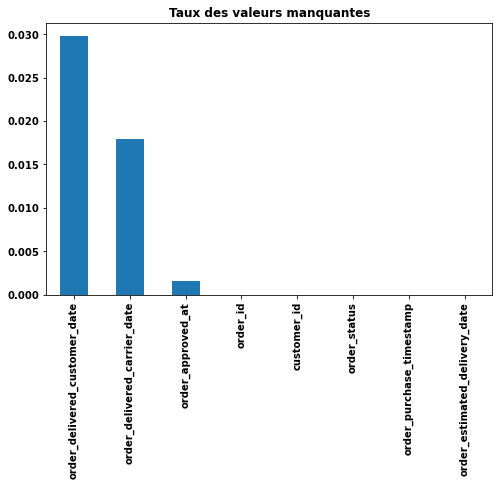

In [31]:
plt.figure(figsize=(8,5))
(df_orders.isna().sum().sort_values(ascending=False)/df_orders.shape[0]).plot.bar()
plt.title('Taux des valeurs manquantes')
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

## Informations sur les produits dans chaque commande <a class="anchor" id="3"></a>

**Fichier "olist_order_items_dataset.csv"**

In [32]:
df_order_items = olist_order_items_dataset.copy()
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [33]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Fichier "olist_products_dataset.csv"**

In [34]:
df_products = olist_products_dataset.copy()
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [35]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Fichier "product_category_name_translation.csv"**

In [36]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [37]:
print("La dimension de ce dataframe est :",product_category_name_translation.shape)

La dimension de ce dataframe est : (71, 2)


**Concaténation des 3 fichiers**

In [106]:
df_order_items_products = df_order_items.merge(df_products, on = 'product_id').merge(product_category_name_translation, on='product_category_name', how='left')
%store df_order_items_products

Stored 'df_order_items_products' (DataFrame)


In [107]:
df_order_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [108]:
print('la dimension du dataframe fusionné est :', df_order_items_products.shape)

la dimension du dataframe fusionné est : (112650, 16)


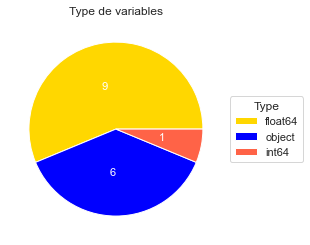

In [110]:
tmp = df_order_items_products.dtypes.value_counts()
values = tmp.values
labels = tmp.keys()
colors = ['gold',"blue","tomato"]

plt.pie(values, 
        labels=values,
        textprops={'color':"w"},
        labeldistance=0.5, 
        colors=colors)

plt.legend(labels,
          title="Type",
          loc="center left", 
          bbox_to_anchor=(1, 0.5), ncol=1)

plt.title('Type de variables')
plt.ylabel(None)
plt.show()

On a 6 variables de type 'object', regardons de près à quoi correspendent-elles :

In [42]:
df_order_items_products.select_dtypes(object).nunique()

order_id                         98666
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
product_category_name               73
product_category_name_english       71
dtype: int64

**Clé-valeur**

In [43]:
#nombre de lignes dupliquées (chaque ligne est identifiée par la clé-valeur ('order_id', 'order_item_id'))
len(df_order_items_products[df_order_items_products.duplicated(subset=['order_id', 'order_item_id'], keep=False)])

0

**Transformer la variable date**

On observe que la variable "shipping_limit_date" est définie comme de type "object", donc on peut transformer ce variable en type datetime

In [44]:
df_order_items_products.shipping_limit_date = pd.to_datetime(df_order_items.shipping_limit_date)

**Product_category_name**

La variable "product_category_name" contient 73 valeurs uniques mais "product_category_name_english" contient que 71 valeurs uniques! On va analyser ces deux variables pour savoir la raison de cette différence.

In [45]:
bool = df_order_items_products.duplicated(['product_category_name', 'product_category_name_english'])
translate = df_order_items_products.loc[bool==False,['product_category_name', 'product_category_name_english']]
translate[translate.product_category_name_english.isna()]

,product_category_name,product_category_name_english
3296,NaN,NaN
35415,portateis_cozinha_e_preparadores_de_alimentos,NaN
63329,pc_gamer,NaN


Effectivement, il y a deux produits dont on ne dispose pas leur traduction en anglais, on va remplacer ces valeurs manquantes par la traduction.

In [46]:
tr1 = 'kitchen and food preparation'
tr2 = 'pc_gamer'

df_order_items_products.loc[df_order_items_products.product_category_name==tr1,'product_category_name_english'] = tr1
df_order_items_products.loc[df_order_items_products.product_category_name==tr2,'product_category_name_english'] = tr2
df_order_items_products.drop(columns=['product_category_name'], inplace=True)

**order_item_id**

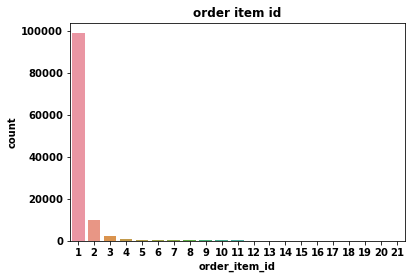

In [47]:
sns.countplot(data = df_order_items_products, x = 'order_item_id')
plt.title('order item id')
plt.show()

## la majorité des commandes contiennent un seul produit

**Variables quantitatives**

In [48]:
print('La liste des variables quantitatives :')
for col in df_order_items_products.select_dtypes('float').columns:
    print('-',col)

La liste des variables quantitatives :
- price
- freight_value
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm


**La variable 'price'**

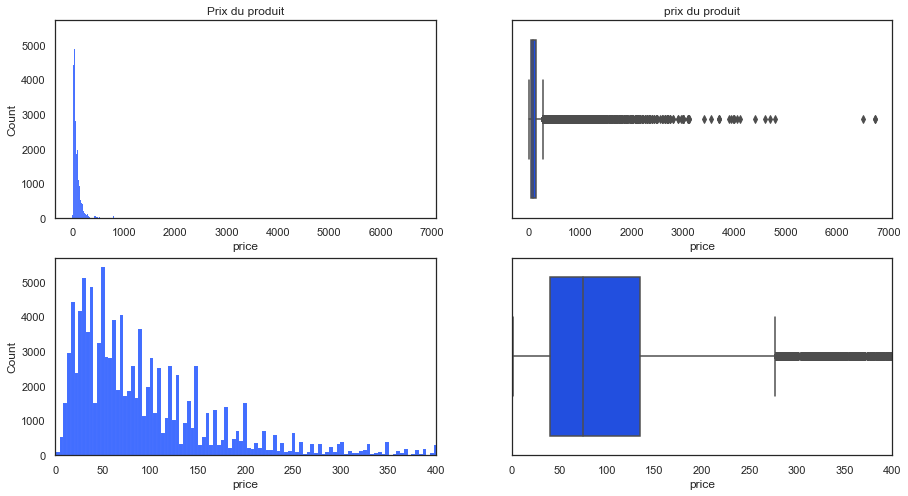

In [99]:
var = 'price'
df = df_order_items_products

fig = plt.figure(figsize=(15,8))
plt.subplot(221)
sns.histplot(data=df, 
             x=var)
plt.title('Prix du produit')

plt.subplot(222)
sns.boxplot(data=df, x=var)
plt.title('prix du produit')

plt.subplot(223)
sns.histplot(data=df, x=var)
plt.xlim(0,400)

plt.subplot(224)
sns.boxplot(data=df, x=var)
plt.xlim(0,400)

plt.show()

fig.savefig('prixprod.png')

Il y a des valeurs extrêmes dans la variable 'price', regardons de près les prix selon la catégorie :

In [50]:
#les prix les plus élevés
display(df_order_items_products.loc[df_order_items_products.price > 4000, ['price','product_category_name_english']]\
.sort_values(by='price', ascending=False))

#les prix les plus bas
display(df_order_items_products.loc[df_order_items_products.price < 10, ['price','product_category_name_english']]\
.sort_values(by='price', ascending=False))

,price,product_category_name_english
37101,6735.00,housewares
112569,6729.00,computers
111726,6499.00,art
103335,4799.00,small_appliances
60252,4690.00,small_appliances
99306,4590.00,computers
81704,4399.87,musical_instruments
92236,4099.99,consoles_games
102761,4059.00,sports_leisure


,price,product_category_name_english
101602,9.99,fashion_bags_accessories
72107,9.99,computers_accessories
72195,9.99,stationery
36409,9.99,baby
36410,9.99,baby
...,...,...
97525,1.20,health_beauty
97527,1.20,health_beauty
80498,0.85,construction_tools_construction
80497,0.85,construction_tools_construction


La variabilité de la variable 'price' est résonnable parce que la plateforme contient des produits variés qui peuvent valoir jusqu'à 6700 comme les ordinateurs et des produits qui valent 0.85

**Frais de transport**

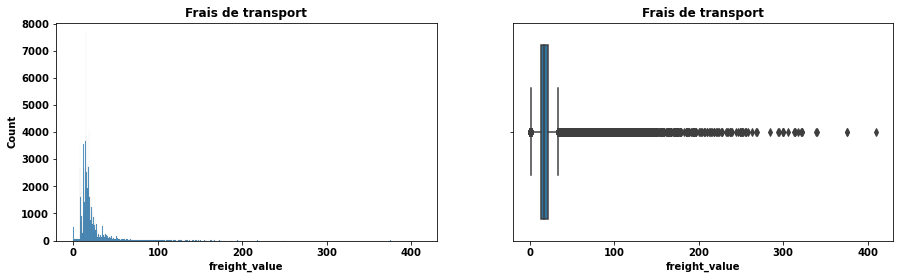

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


In [51]:
var = 'freight_value'

fig = plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(data=df_order_items_products, 
             x=var)
plt.title('Frais de transport')

plt.subplot(122)
sns.boxplot(data=df_order_items_products, 
            x=var)
plt.title('Frais de transport')

plt.show()

fig.savefig('fraistrans.png')

print(df_order_items_products[var].describe())

Les frais de transport varient entre 0 et 409 environ. Les frais coûte environ 20 en moyenne

**Les variables :**
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

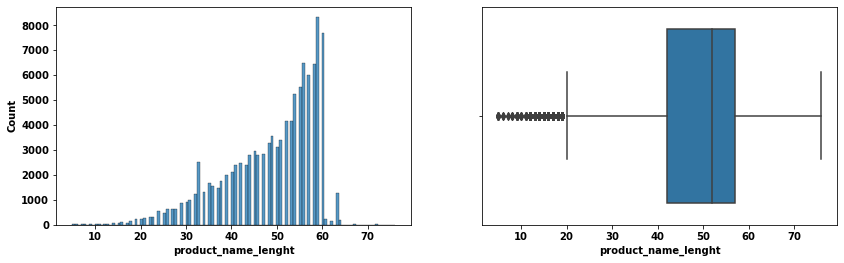

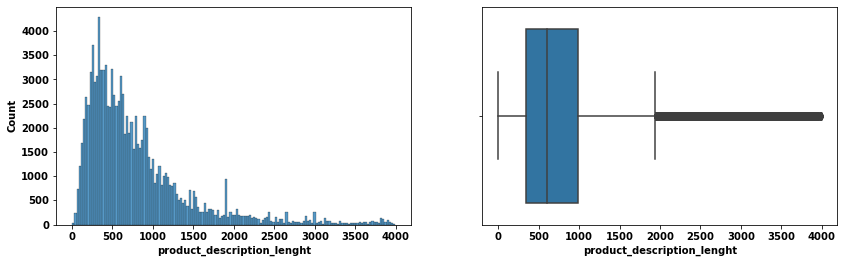

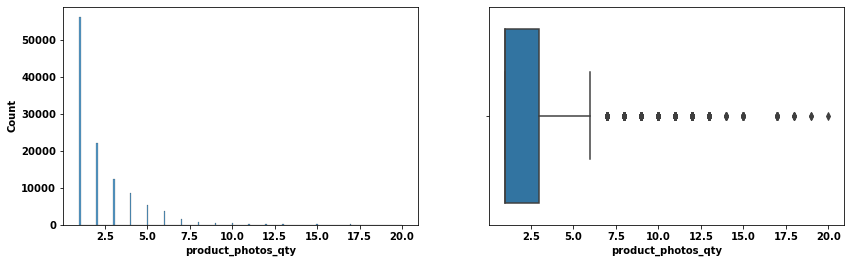

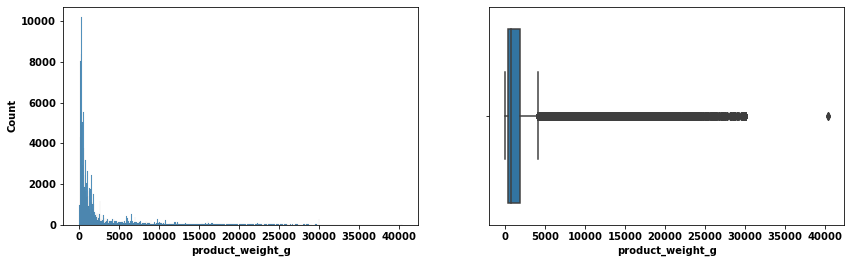

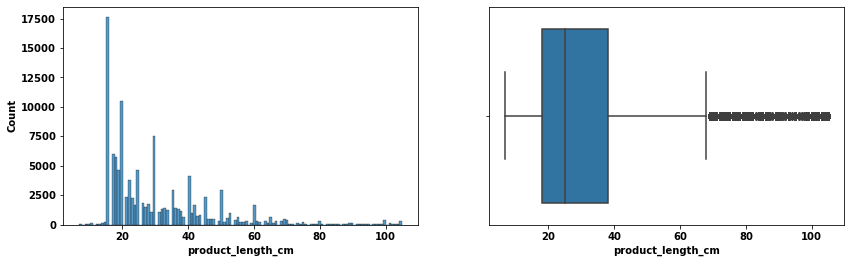

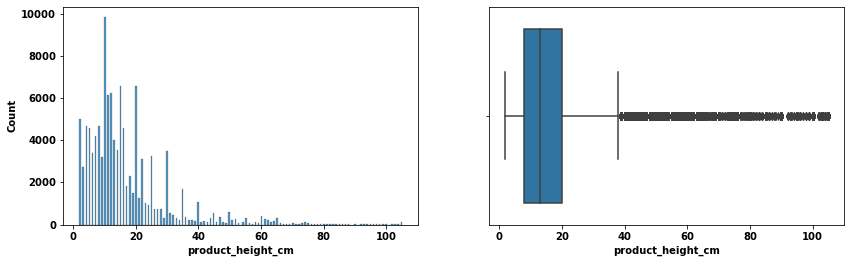

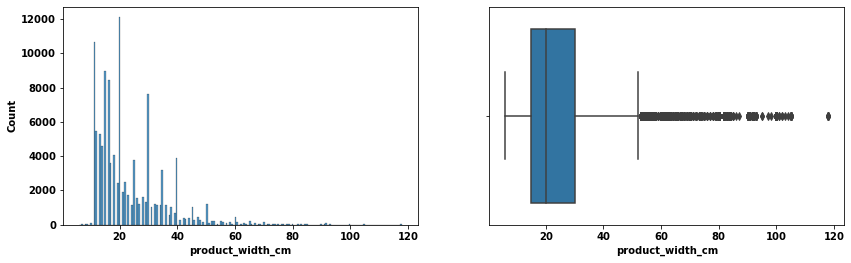

In [52]:
variables  = df_order_items_products.select_dtypes('number').columns[3:]

for var in variables:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data=df_order_items_products, x=var)
    plt.subplot(122)
    sns.boxplot(data=df_order_items_products, x=var)
    plt.show()

**Date limite de livraison**

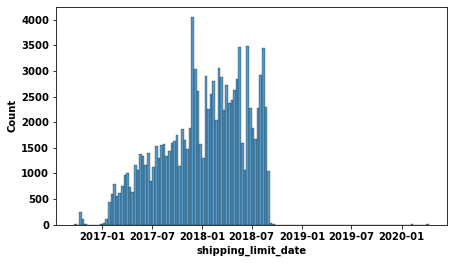

In [53]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df_order_items_products.shipping_limit_date)
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

## Informations sur les paiements effectués par les clients qui ont passé les commandes  <a class="anchor" id="4"></a>

In [54]:
df_payments = olist_order_payments_dataset.copy()
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [55]:
print('La dimension du fichier paiements est :', df_payments.shape)

La dimension du fichier paiements est : (103886, 5)


**Type de variables**

In [56]:
df_payments.dtypes.sort_values()

payment_sequential        int64
payment_installments      int64
payment_value           float64
order_id                 object
payment_type             object
dtype: object

**Nombre de doublons**

In [57]:
len(df_payments[df_payments.duplicated(subset=df_payments.columns, keep=False)])

0

**Les variables 'payment_sequential' , 'payment_type' , 'payment_installments'**

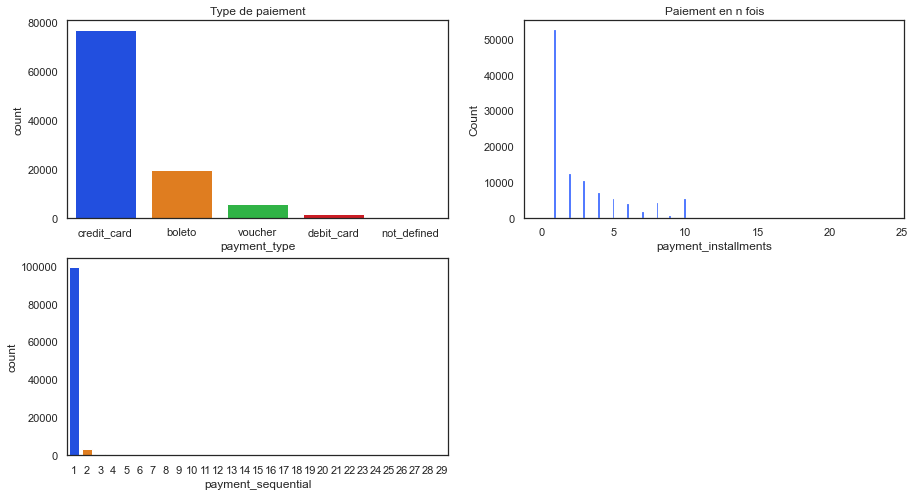

In [58]:
fig = plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette='bright')
plt.subplot(221)
sns.countplot(data=df_payments, 
              x='payment_type')
plt.title('Type de paiement')

plt.subplot(222)
sns.histplot(data=df_payments, 
             x='payment_installments')
plt.title('Paiement en n fois')

plt.subplot(223)
sns.countplot(data=df_payments, 
             x='payment_sequential', palette='bright')

plt.show()

**La variable 'payment_value'**

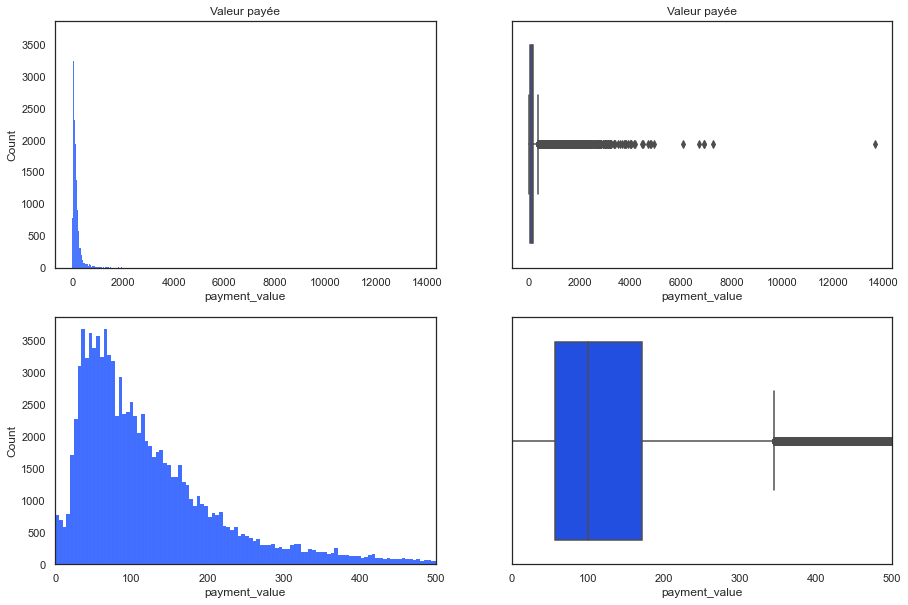

In [59]:
var = 'payment_value'
title = 'Valeur payée'
fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=df_payments, 
             x=var)
plt.title(title)

plt.subplot(222)
sns.boxplot(data=df_payments, 
            x=var)
plt.title(title)

plt.subplot(223)
sns.histplot(data=df_payments, 
             x=var)
plt.xlim(0,500)
plt.title(None)

plt.subplot(224)
sns.boxplot(data=df_payments, 
            x=var)
plt.xlim(0,500)
plt.title(None)
plt.show()

fig.savefig('payments_val.png')

In [60]:
#le montant maximal payé d'une commande
payment_max = df_payments.payment_value.max()
order_id_payment_value_max = df_payments.loc[df_payments.payment_value == payment_max,'order_id'].values[0]
display(df_payments[df_payments.order_id == order_id_payment_value_max])
display(df_orders[df_orders.order_id == order_id_payment_value_max])
display(df_order_items_products[df_order_items_products.order_id == order_id_payment_value_max])


,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13390,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
25117,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2018-03-15 02:30:36,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25118,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-05 09:10:26,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25119,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2018-08-13 17:10:19,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25120,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2018-08-03 07:55:14,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25121,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2018-04-12 07:48:06,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25122,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-06-08 22:55:06,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25123,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-03-09 09:10:11,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
25124,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2018-06-18 02:18:50,1680.0,28.01,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony


**Valeurs manquantes**

In [61]:
df_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

<a href="#sommaire" rev="footnote">&#8617;</a>

## Informations sur les avis des clients sur les commandes passés <a class="anchor" id="5"></a>

In [62]:
df_reviews = olist_order_reviews_dataset.copy()
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [63]:
print('La dimension du fichier reviex est :', df_reviews.shape)

La dimension du fichier reviex est : (99224, 7)


In [64]:
df_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

**Transformation des variables 'review_creation_date', 'review_answer_timestamp' en pandas.datetime**

In [65]:
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'])
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])

In [66]:
df_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

**Doublons**

In [67]:
#affichage des dooblons (meme review score, reviw_id, date, commentaire pour des orders différents !!!)
subset = ['review_id',
        'review_answer_timestamp',
        'review_comment_message',
        'review_score',
        'review_creation_date']

df_reviews[df_reviews.duplicated(subset=subset, keep=False)].sort_values(by='review_id')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07,2018-03-20 18:08:23
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07,2018-03-20 18:08:23
90677,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21,2017-09-26 03:27:47
63193,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21,2017-09-26 03:27:47
92876,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07,2018-03-08 03:00:53
...,...,...,...,...,...,...,...
31120,fe5c833752953fed3209646f1f63b53c,4863e15fa53273cc7219c58f5ffda4fb,1,NaN,"Comprei dois produtos e ambos, mesmo enviados ...",2018-02-28,2018-02-28 13:57:52
7870,ff2fc9e68f8aabfbe18d710b83aabd30,2da58e0a7dcfa4ce1e00fad9d03ca3b5,2,NaN,NaN,2018-03-17,2018-03-19 11:44:15
82521,ff2fc9e68f8aabfbe18d710b83aabd30,1078d496cc6ab9a8e6f2be77abf5091b,2,NaN,NaN,2018-03-17,2018-03-19 11:44:15
73951,ffb8cff872a625632ac983eb1f88843c,c44883fc2529b4aa03ca90e7e09d95b6,3,NaN,NaN,2017-07-22,2017-07-26 13:41:07


In [68]:
#supprimer des doublons
df_reviews.drop_duplicates(subset=subset,
                           keep='first', 
                           inplace=True)

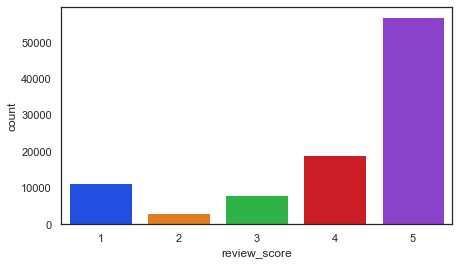

In [69]:
fig = plt.figure(figsize=(7,4))
sns.countplot(data=df_reviews, 
              x='review_score')
plt.show()
fig.savefig('review.png')

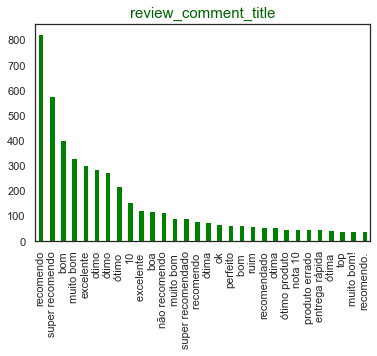

In [70]:
var = 'review_comment_title'
df_reviews[var].str.lower().value_counts()[:30].plot.bar(color='green')
plt.title(var, color='darkgreen', size=15)
plt.show()

**Valeurs manquantes**

In [71]:
df_reviews.isna().sum().sort_values(ascending=False)/df_reviews.shape[0]

review_comment_title       0.882949
review_comment_message     0.586749
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

<a href="#sommaire" rev="footnote">&#8617;</a>

## Informations sur les vendeurs<a class="anchor" id="6"></a>

In [72]:
df_sellers = olist_sellers_dataset.copy()
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [73]:
print('La dimension du fichier vendeur est :', df_sellers.shape)

La dimension du fichier vendeur est : (3095, 4)


In [74]:
df_sellers.nunique().sort_values(ascending=False)

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

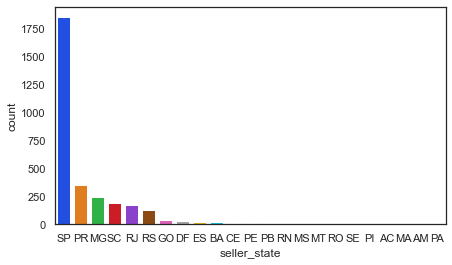

In [75]:
plt.figure(figsize=(7,4))
order = df_sellers.seller_state.value_counts().keys()
sns.countplot(data=df_sellers, x='seller_state', order=order, palette='bright')
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

## Construire le fichiers pour la segmentation RFM<a class="anchor" id="7"></a>

In [76]:
#fusionner le fichier customers et fichier orders
df_customers_orders = df_customers.merge(df_orders, on='customer_id', how='left')
df_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [77]:
print("La dimension du fichier customers est :", df_customers.shape)
print("La dimension du fichier customers concaténé avec le fichier orders est :", df_customers_orders.shape)

La dimension du fichier customers est : (99441, 5)
La dimension du fichier customers concaténé avec le fichier orders est : (99441, 12)


**Calcul de la somme des montant payés et le nombre de produits par commande**

In [78]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
#calcul de la somme des montant payés et le nombre de produits par commande
orders = df_payments.groupby('order_id').agg(montant_command=('payment_value', 'sum'), 
                                             n_produits=('payment_value', 'count')).reset_index()
orders.head()

,order_id,montant_command,n_produits
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,1
1,00018f77f2f0320c557190d7a144bdd3,259.83,1
2,000229ec398224ef6ca0657da4fc703e,216.87,1
3,00024acbcdf0a6daa1e931b038114c75,25.78,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,1


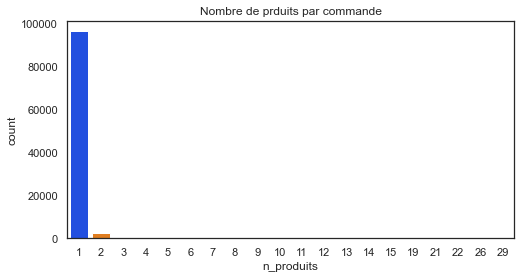

In [103]:
var = 'n_produits'
title = 'Nombre de prduits par commande'
df = orders

fig = plt.figure(figsize=(8,4))

sns.countplot(data=df, x=var, palette='bright')
plt.title(title)

plt.show()

fig.savefig('nprod.png')

**Calcul de review_score moyen par commande**

In [80]:
#calcul de review_score moyen par commande
review_mean = df_reviews.groupby('order_id').agg({'review_score':'mean'}).reset_index()

review_mean.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [81]:
#fusionner le fichiers customers avec le review_score, le montant payé et le nombre de produits par commande
data = df_customers_orders.merge(orders, on='order_id').merge(review_mean, on='order_id')
%store data
data.head()

Stored 'data' (DataFrame)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,montant_command,n_produits,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,146.87,1,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,335.48,1,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,157.73,1,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,173.30,1,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,252.25,1,5.0


In [82]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
montant_command                         float64
n_produits                                int64
review_score                            float64
dtype: object

**Calcul de la Recence, la fréquence et le montant**

In [83]:
from datetime import timedelta

NOW = data.order_purchase_timestamp.max() + timedelta(1)
%store NOW
data['DaysSinceOrder'] = data['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

aggs = {'DaysSinceOrder' : lambda x : min(x),
       'order_purchase_timestamp' : 'count',
       'montant_command' : sum}

rfm = data.groupby('customer_unique_id').agg(aggs).reset_index()
rfm.rename(columns={'DaysSinceOrder':'Recency', 'order_purchase_timestamp':'Frequency', 'montant_command':'Monetary'},
           inplace=True)
%store rfm
display(rfm.head())

Stored 'NOW' (Timestamp)
Stored 'rfm' (DataFrame)


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89


**La récence**

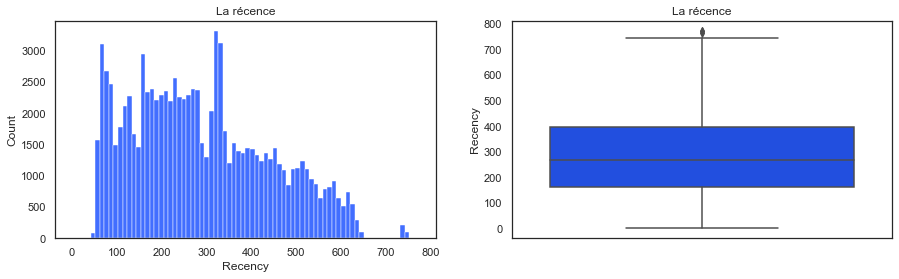

In [84]:
var = 'Recency'
title = 'La récence'
df = rfm

fig = plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(data=df, 
             x=var)
plt.title(title)

plt.subplot(122)
sns.boxplot(data=df, 
            y=var)
plt.title(title)

plt.show()

fig.savefig('recence.png')

**La fréquence d'achat par client**

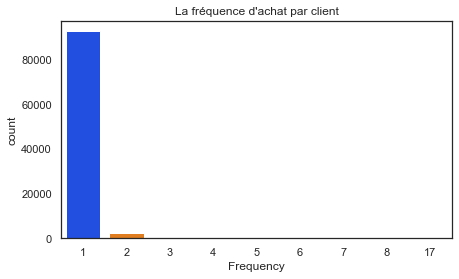

In [85]:
var = 'Frequency'
title = 'La fréquence d\'achat par client'
df = rfm

fig = plt.figure(figsize=(7,4))

sns.countplot(data=df, x=var, palette='bright')
plt.title(title)

plt.show()

fig.savefig('frequency.png')

**Le montant total par client**

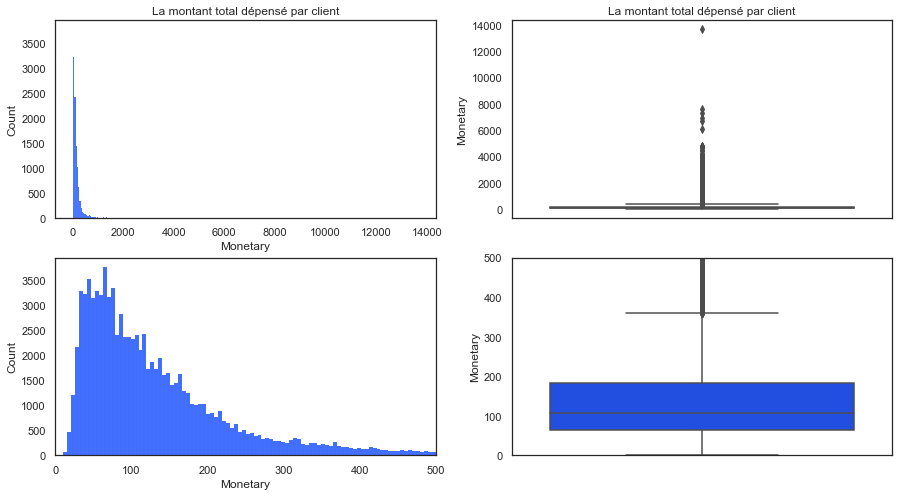

In [97]:
var = 'Monetary'
title = 'La montant total dépensé par client'
df = rfm

fig = plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=df, x=var)
plt.title(title)

plt.subplot(222)
sns.boxplot(data=df, y=var)
plt.title(title)

plt.subplot(223)
sns.histplot(data=df, x=var)
plt.xlim(0,500)

plt.subplot(224)
sns.boxplot(data=df, y=var)
plt.ylim(0,500)

plt.show()

fig.savefig('monetary.png')

**Calcul du log de la Recence, de la fréquence et du montant**

In [87]:
epsilon = 10e-3
rfm_log = rfm.iloc[:,1:].apply(lambda x : np.log(x+epsilon))
display(rfm_log.head())
%store rfm_log

,Recency,Frequency,Monetary
0,5.081466,0.00995,4.955193
1,5.099927,0.00995,3.303217
2,6.373337,0.00995,4.457018
3,5.913530,0.00995,3.775745
4,5.820113,0.00995,5.282696


Stored 'rfm_log' (DataFrame)


**Le log de la récence**

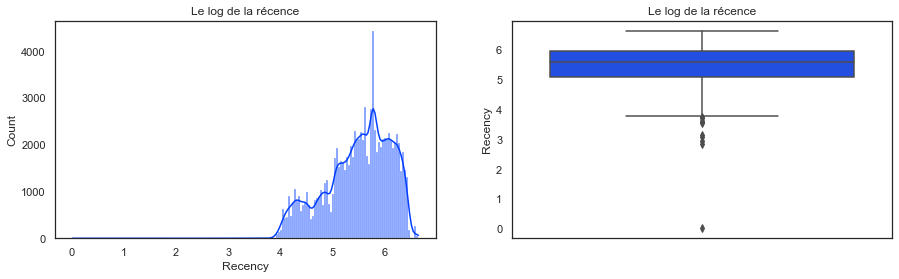

In [88]:
var = 'Recency'
title = 'Le log de la récence'
df = rfm_log

fig = plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(data=df, x=var, kde=True)
plt.title(title)

plt.subplot(122)
sns.boxplot(data=df, 
            y=var)
plt.title(title)

plt.show()

fig.savefig('logrecence.png')

**Le log de la fréquence d'achat par client**

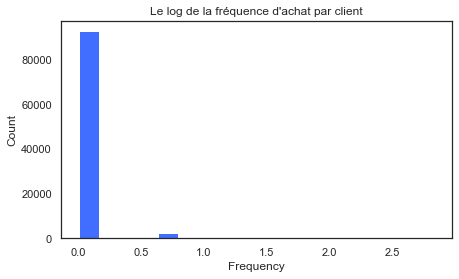

In [89]:
var = 'Frequency'
title = 'Le log de la fréquence d\'achat par client'
df = rfm_log

fig = plt.figure(figsize=(7,4))

sns.histplot(data=df, x=var, palette='bright')
plt.title(title)

plt.show()

fig.savefig('logfrequency.png')

**Le montant total par client**

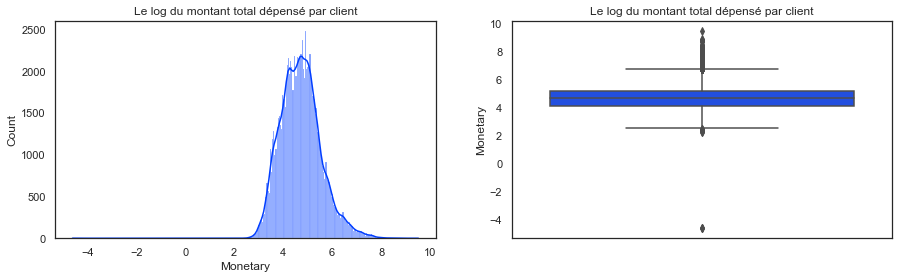

In [90]:
var = 'Monetary'
title = 'Le log du montant total dépensé par client'
df = rfm_log

fig = plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(data=df, x=var, kde=True)
plt.title(title)

plt.subplot(122)
sns.boxplot(data=df, y=var)
plt.title(title)

plt.show()

fig.savefig('logmonetary.png')

<a href="#sommaire" rev="footnote">&#8617;</a>